In [15]:
import numpy as np
import math
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


# Question 1

The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on pre-processing and formatting.

In [2]:
mnist = fetch_openml('mnist_784')

/opt/conda/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


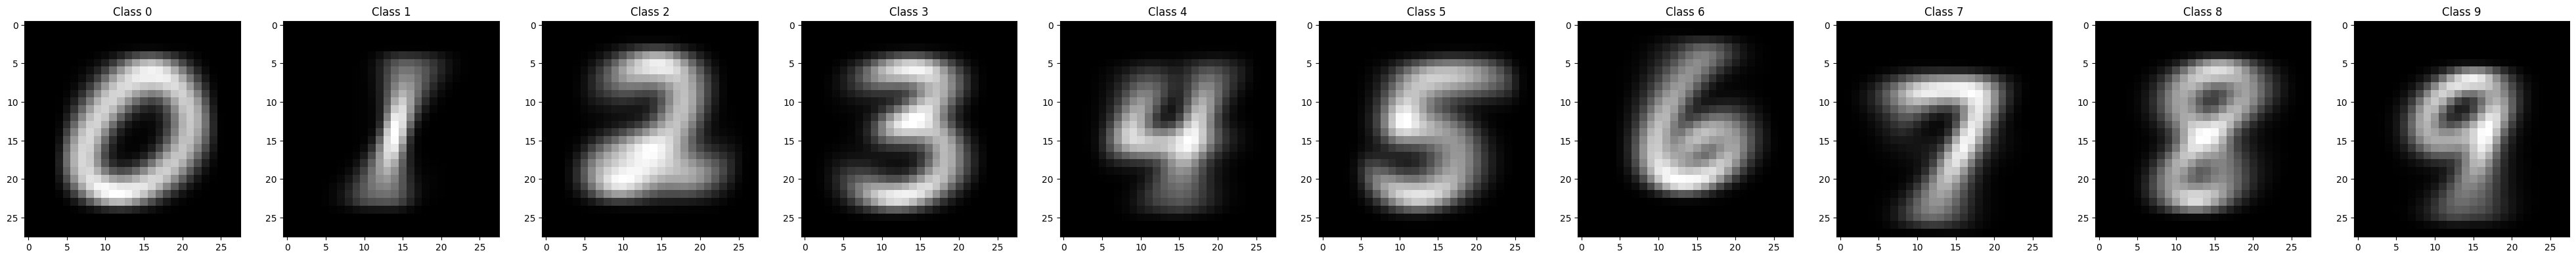

In [3]:
mnist_data = mnist.data
mnist_target = mnist.target

X_train, X_test, y_train, y_test = train_test_split(mnist_data, mnist_target, test_size=0.1)
X_train, X_test = X_train.to_numpy(), X_test.to_numpy()
y_train = y_train.cat.codes.to_numpy()
y_test = y_test.cat.codes.to_numpy()

mean_images = []
for i in range(10):
    mean_image = np.mean(X_train[y_train == i], axis=0)
    mean_images.append(mean_image)

fig, axes = plt.subplots(1, 10, figsize=[50, 5])
for i in range(10):
    mean_image = mean_images[i].reshape(28, 28)
    axes[i].imshow(mean_image, interpolation=None, cmap='gray')
    axes[i].set_title(f'Class {i}')

plt.show()


### Observations 
as we can see from the above plot the average of images looks highly familiar to the label class of the image. For example, the average of images of class 0 looks like a 0, the average of images of class 1 looks like a 1, and so on. This is because the average of images of a class is the sum of all images of that class divided by the number of images of that class. So, the average of images of a class is the image that is most similar to all images of that class. This is why the average of images of a class looks like the label class of the image.

# Question 2

Perform Linear Discriminant Analysis (LDA) on the MNIST dataset* for binary as well as for multiclass classification. Plot confusion matric and find out the combinations where the classifier is confused in predicting the right label.

## Code

In [9]:
def calculate_covariance(x1, x2):
    mean_x1 = np.mean(x1)
    mean_x2 = np.mean(x2)
    return np.mean((x1 - mean_x1) * (x2 - mean_x2))

def handle_singular_matrix(matrix):
    if np.linalg.det(matrix) == 0:
        noise = np.random.normal(0, 1e-12, matrix.size).reshape(matrix.shape)
        matrix += noise
    return matrix

def calculate_lda(x, mean, covariance, prior):
    diff = x - mean
    inv_covariance = np.linalg.inv(covariance)
    return -0.5 * diff.T @ inv_covariance @ diff + np.log(prior)

----------Binary Classification Report -------------

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        18
     Class 1       1.00      1.00      1.00        19

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



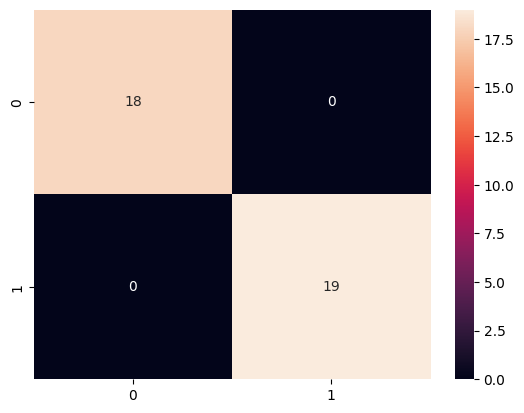

In [10]:
digits = load_digits()
X = digits.data
y = digits.target

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X[y == 0], y[y == 0], test_size=0.1, random_state=42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X[y == 1], y[y == 1], test_size=0.1, random_state=42)

cov_matrix_0 = handle_singular_matrix(np.cov(X_train_0.T))
cov_matrix_1 = handle_singular_matrix(np.cov(X_train_1.T))

mean_vector_0 = np.mean(X_train_0, axis=0).reshape(-1, 1)
mean_vector_1 = np.mean(X_train_1, axis=0).reshape(-1, 1)

avg_cov_matrix = (cov_matrix_0 + cov_matrix_1) / 2
inv_avg_cov_matrix = np.linalg.inv(avg_cov_matrix)

theta = inv_avg_cov_matrix @ (mean_vector_0 - mean_vector_1)
theta_0 = np.log(0.5) - 0.5 * (mean_vector_0.T @ inv_avg_cov_matrix @ mean_vector_0 - mean_vector_1.T @ inv_avg_cov_matrix @ mean_vector_1)

y_pred = []
y_true = []

for x in X_test_0:
    delta = x @ theta + theta_0
    y_pred.append(0 if delta > 0 else 1)
    y_true.append(0)

for x in X_test_1:
    delta = x @ theta + theta_0
    y_pred.append(0 if delta > 0 else 1)
    y_true.append(1)

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True)

print('----------Binary Classification Report -------------\n')

labels = ['Class 0', 'Class 1']

print(classification_report(y_true, y_pred, target_names=labels))

---------- Multiclass Classification Report -------------

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        20
     Class 1       0.95      1.00      0.98        20
     Class 2       1.00      1.00      1.00        15
     Class 3       1.00      1.00      1.00        19
     Class 4       1.00      0.92      0.96        25
     Class 5       0.92      1.00      0.96        11
     Class 6       1.00      1.00      1.00        14
     Class 7       0.95      1.00      0.97        19
     Class 8       1.00      1.00      1.00        12
     Class 9       1.00      0.96      0.98        25

    accuracy                           0.98       180
   macro avg       0.98      0.99      0.98       180
weighted avg       0.98      0.98      0.98       180



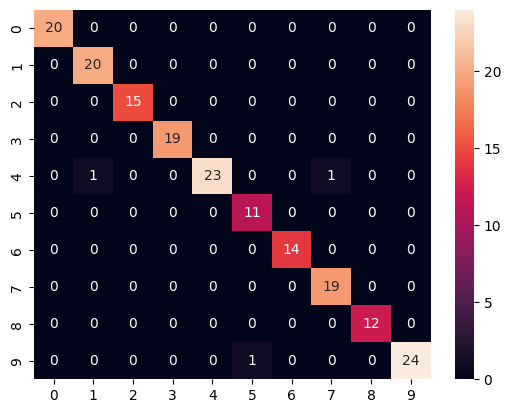

In [11]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_covariance(x1, x2):
    mean_x1 = np.mean(x1)
    mean_x2 = np.mean(x2)
    return np.mean((x1 - mean_x1) * (x2 - mean_x2))

def handle_singular_matrix(matrix):
    if np.linalg.det(matrix) == 0:
        noise = np.random.normal(0, 1e-12, matrix.size).reshape(matrix.shape)
        matrix += noise
    return matrix

def calculate_lda(x, mean, covariance, prior):
    diff = x - mean
    inv_covariance = np.linalg.inv(covariance)
    return -0.5 * diff.T @ inv_covariance @ diff + np.log(prior)

digits = load_digits()
Xtemp = digits.data
ytemp = digits.target

num_classes = 10

Xtemp, X_test, ytemp, y_test = train_test_split(Xtemp, ytemp, test_size=0.1)

X_train_classes = [Xtemp[ytemp == i] for i in range(num_classes)]

priors = [len(X_train_class) / len(Xtemp) for X_train_class in X_train_classes]

mean_vectors = [np.mean(X_train_class, axis=0).reshape(-1, 1) for X_train_class in X_train_classes]

cov_matrices = []
for X_train_class in X_train_classes:
    cov_matrix = []
    for i in range(X_train_class.shape[1]):
        row = []
        for j in range(X_train_class.shape[1]):
            row.append(calculate_covariance(X_train_class[:, i], X_train_class[:, j]))
        cov_matrix.append(row)
    cov_matrices.append(handle_singular_matrix(np.array(cov_matrix)))

avg_cov_matrix = sum(cov_matrices) / num_classes

y_pred = []
y_true = []

for i in range(len(y_test)):
    test_sample = X_test[i].reshape(-1, 1)
    deltas = []
    for j in range(num_classes):
        deltas.append(calculate_lda(test_sample, mean_vectors[j], avg_cov_matrix, priors[j]))
    y_pred.append(np.argmax(deltas))
    y_true.append(y_test[i])

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True)

print('---------- Multiclass Classification Report -------------\n')

labels = [f'Class {i}' for i in range(num_classes)]

print(classification_report(y_true, y_pred, target_names=labels))


# Question 3

Perform Quadratic Discriminant Analysis (QDA) on the MNIST dataset* for multiclass classification. Plot confusion matric and find out the combinations where the classifier is confused in predicting the right label.

Referred and learnt from - https://www.youtube.com/watch?v=IMfLXEOksGc&ab_channel=BillBasener

/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Model Score:  0.537


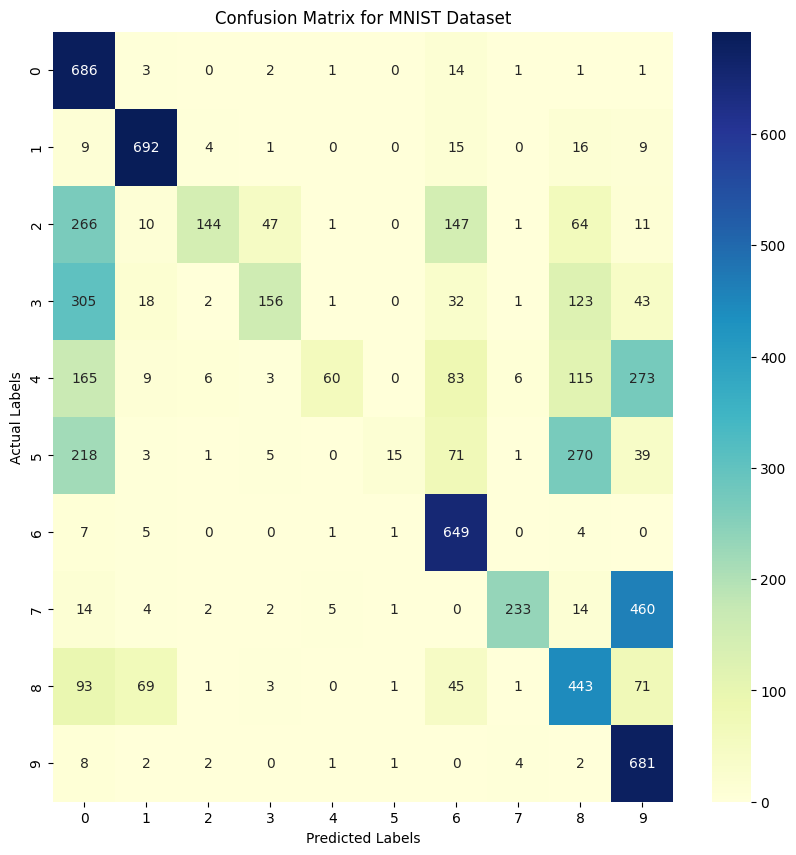

In [29]:
images = np.concatenate((train_images, test_images))
labels = np.concatenate((train_labels, test_labels))

# Splitting the data into training and testing sets with a ratio of 9:1
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, train_size=0.9, random_state=42)

# Rescaling the images from [0,255] to the [0.0,1.0] range
train_images, test_images = train_images/255.0, test_images/255.0

# Flattening the images for the model
train_images_flattened = train_images.reshape(len(train_images), 28*28)
test_images_flattened = test_images.reshape(len(test_images), 28*28)

# Creating and training the Quadratic Discriminant Analysis model
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(train_images_flattened, train_labels)

# Scoring the model on the test set
print("Model Score: ", qda_model.score(test_images_flattened, test_labels))

# Predicting the labels for the test set
predicted_labels = qda_model.predict(test_images_flattened)

# Creating a Confusion Matrix
plt.figure(figsize=(10, 10))
confusion_mat = confusion_matrix(test_labels, predicted_labels)
sns.heatmap(confusion_mat, annot=True, annot_kws={"size": 10}, fmt='d', cmap="YlGnBu")
plt.title('Confusion Matrix for MNIST Dataset')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()


In [30]:
labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
print(classification_report(y_test,y_pred, target_names = labels))

              precision    recall  f1-score   support

     Class 0       0.32      0.97      0.48       683
     Class 1       0.94      0.61      0.74       800
     Class 2       0.85      0.22      0.35       674
     Class 3       0.67      0.31      0.43       760
     Class 4       0.81      0.08      0.14       611
     Class 5       0.97      0.12      0.21       658
     Class 6       0.59      0.96      0.73       677
     Class 7       0.92      0.32      0.48       724
     Class 8       0.48      0.49      0.49       693
     Class 9       0.41      0.95      0.57       720

    accuracy                           0.51      7000
   macro avg       0.70      0.50      0.46      7000
weighted avg       0.70      0.51      0.47      7000



### Observation/Justification

Based on the analysis, it can be inferred that Linear Discriminant Analysis (LDA) is a more appropriate choice for the classification of the MNIST dataset compared to Quadratic Discriminant Analysis (QDA). The primary reason for this is that QDA tends to fit a more flexible classifier than what is required for this particular dataset. 

In essence, LDA assumes that the classes have identical covariance matrices, which leads to linear decision boundaries, making it less flexible but more robust to overfitting. On the other hand, QDA does not make this assumption and can model more complex, quadratic decision boundaries. However, this added flexibility can sometimes lead to overfitting, especially when dealing with high-dimensional data like images from the MNIST dataset.

Therefore, while QDA might be more suitable for datasets where the classes have significantly different covariance structures, in the case of the MNIST dataset, LDA's simplicity and robustness make it a more suitable choice.

# Question 4

Perform Naïve-Bayes on the MNIST dataset* for multiclass classification. Plot confusion matric and find out the combinations where the classifier is confused in predicting the right label.

Mean and variance of two classes are, <br>
    Class_1 :  $\mu = 8$ , $\sigma^{2} = 20$  <br>
    Class_2 :  $\mu = 16$ , $\sigma^{2} = 25$  <br>

a. Draw 50 random samples from N[5,20]  <br>
b. Draw 50 random samples from N[11,10]  <br>
c. Draw 50 random samples from N[20,8]  <br>

and classify using Naïve-Bayes classifier having apriory probabilities as (0.5,0.5), (0.3,0.7) and (0.7,0.3) and visualize data and class by plotting histogram.

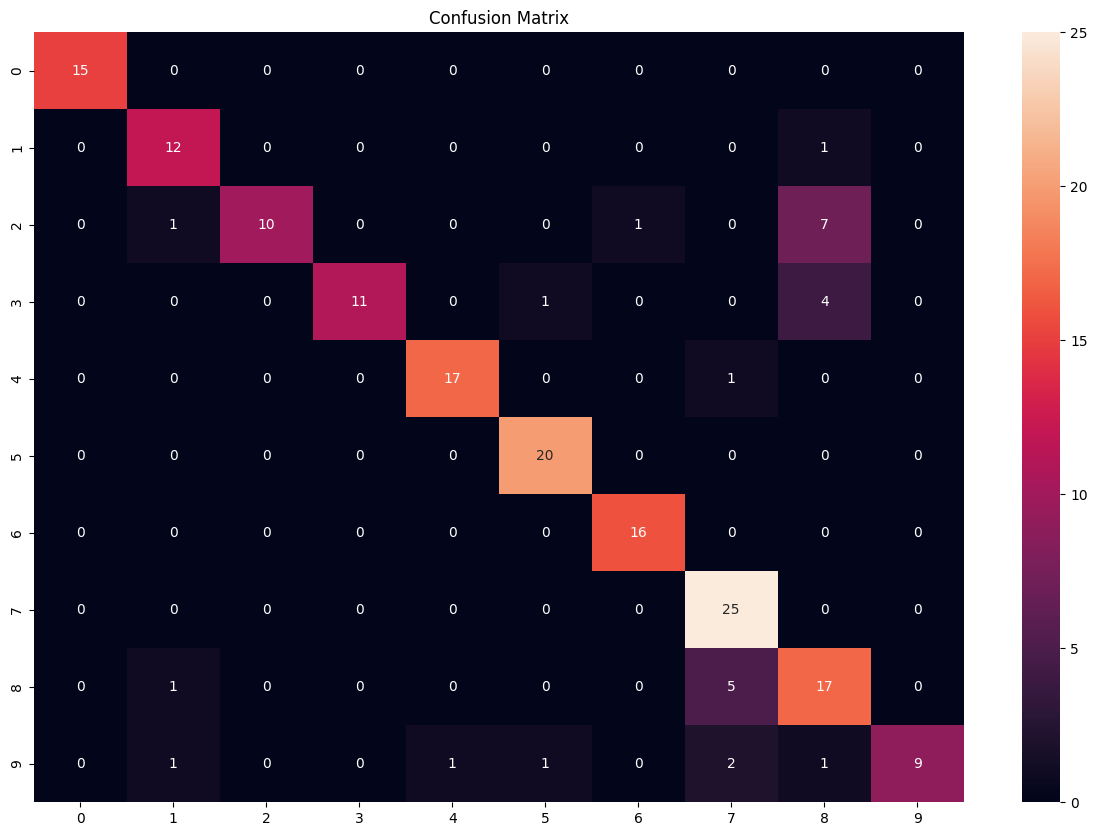

---------- Classification Report -------------

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        15
     Class 1       0.80      0.92      0.86        13
     Class 2       1.00      0.53      0.69        19
     Class 3       1.00      0.69      0.81        16
     Class 4       0.94      0.94      0.94        18
     Class 5       0.91      1.00      0.95        20
     Class 6       0.94      1.00      0.97        16
     Class 7       0.76      1.00      0.86        25
     Class 8       0.57      0.74      0.64        23
     Class 9       1.00      0.60      0.75        15

    accuracy                           0.84       180
   macro avg       0.89      0.84      0.85       180
weighted avg       0.88      0.84      0.84       180



In [22]:
digits_dataset = load_digits()

# Assigning features and target variables
features = digits_dataset.data
target = digits_dataset.target

# Counting total samples
total_samples_count = len(features)

# Defining the total number of classes
num_classes = 10

# Splitting the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1)

# Using Gaussian Naive-Bayes Classifier from sklearn 
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(features_train, target_train)

# Predicting the target for test data
target_predicted = naive_bayes_model.predict(features_test)

# Creating a Confusion Matrix
plt.figure(figsize=(15,10))
confusion_mat = confusion_matrix(target_test, target_predicted)
sns.heatmap(confusion_mat, annot=True)
plt.title('Confusion Matrix')
plt.show()

print('---------- Classification Report -------------\n')

# Defining class labels
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']

# Printing the classification report
print(classification_report(target_test, target_predicted, target_names=class_labels))


#### Observation/Justification

The result is as shown in the graph/confusion matrix above. <br>
For class 8 the classifier is not as precise in predicting the correct label/class as compared to other classes.

In [23]:
import math
import numpy as np
import matplotlib.pyplot as plt

def plot_histograms(data_samples, predicted_labels, prior_prob1, prior_prob2):
    x_values = np.arange(-20, 40, 0.1)
    
    pdf_class1 = ((1/math.sqrt(20))*np.exp((-1/2)*((x_values - 8)/math.sqrt(20))**2))
    pdf_class2 = ((1/math.sqrt(25))*np.exp((-1/2)*((x_values - 16)/math.sqrt(25))**2))
    
    plt.figure(figsize=(10, 6))
    
    plt.title(f"Apriori Probability: ({prior_prob1},{prior_prob2})")
    
    # Plotting histogram and pdf for Class 1
    plt.hist(data_samples[predicted_labels==0], bins=30, density=True, color='skyblue', label='Class 1 Predictions')
    plt.plot(x_values, pdf_class1, 'darkblue', label='N(8,20)')
    
    # Plotting histogram and pdf for Class 2
    plt.hist(data_samples[predicted_labels==1], bins=30, density=True, color='lightgreen', label='Class 2 Predictions')
    plt.plot(x_values, pdf_class2, 'darkgreen', label='N(16,25)')
    
    pdf_combined = prior_prob1 * pdf_class1 + prior_prob2 * pdf_class2
    plt.plot(x_values, pdf_combined, 'purple', label='Combined PDF')
    
    plt.tight_layout()
    plt.legend()
    plt.show()

def predict_class(sample_point, prior_prob1, prior_prob2):
    likelihood_class1 = ((1/math.sqrt(20))*np.exp((-1/2)*((sample_point - 8)/math.sqrt(20))**2))**prior_prob1
    likelihood_class2 = ((1/math.sqrt(25))*np.exp((-1/2)*((sample_point - 16)/math.sqrt(25))**2))**prior_prob2
    
    if likelihood_class1 > likelihood_class2:
        return 0
    else:
        return 1

def naive_bayes_classifier(data_samples, prior_prob1, prior_prob2):
    predicted_labels = []
    
    for i in range(50):
        predicted_labels.append(predict_class(data_samples[i], prior_prob1, prior_prob2))
    
    predicted_labels = np.array(predicted_labels)
    
    # Calling plot histogram function
    plot_histograms(data_samples, predicted_labels, prior_prob1, prior_prob2)

def generate_data(mean_value, std_deviation):
    # Generating data for given mean and standard deviation
    data_samples = np.random.normal(mean_value, std_deviation, 50)
    
    naive_bayes_classifier(data_samples, 0.5, 0.5)
    naive_bayes_classifier(data_samples, 0.3, 0.7)
    naive_bayes_classifier(data_samples, 0.7, 0.3)


a. Draw 50 random samples from N[5,20]  <br>

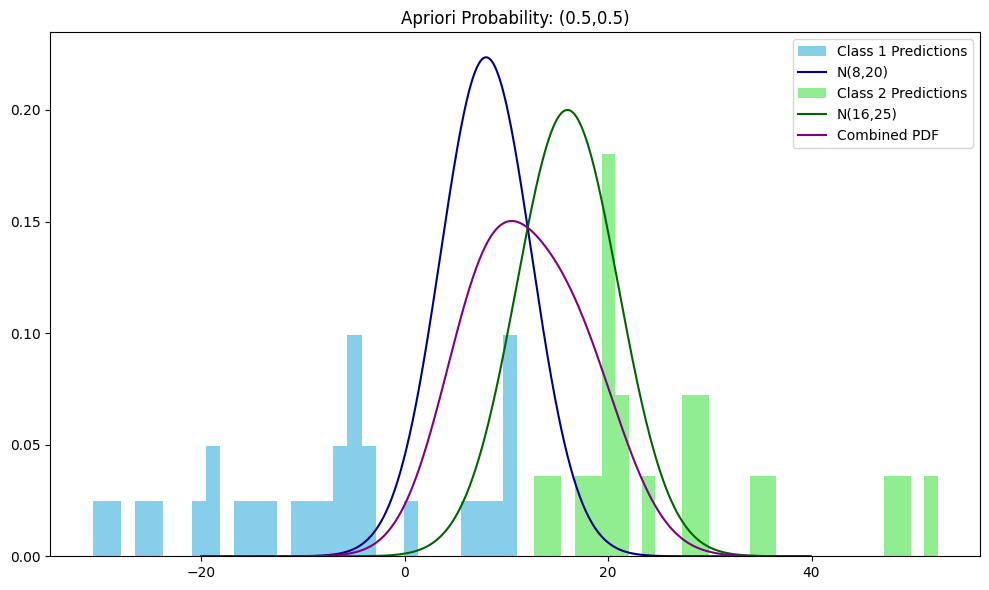

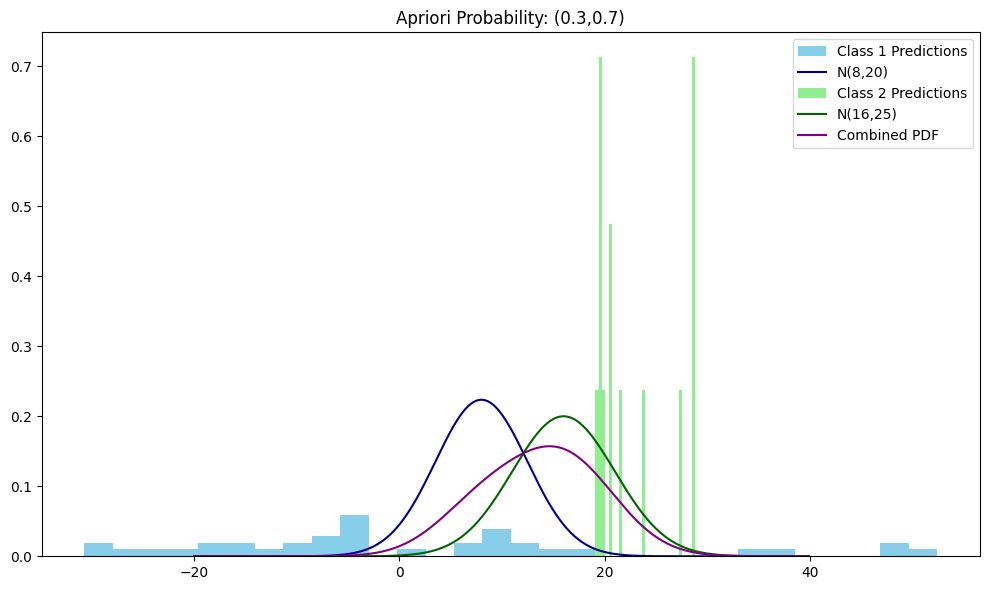

/opt/conda/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


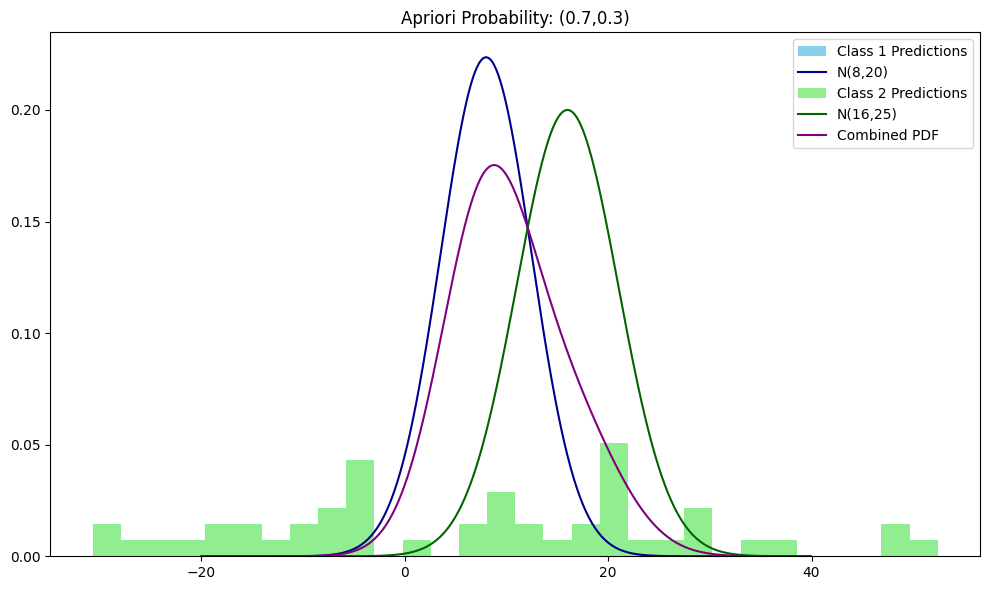

In [24]:
generate_data(5, 20)

b. Draw 50 random samples from N[11,10]  <br>


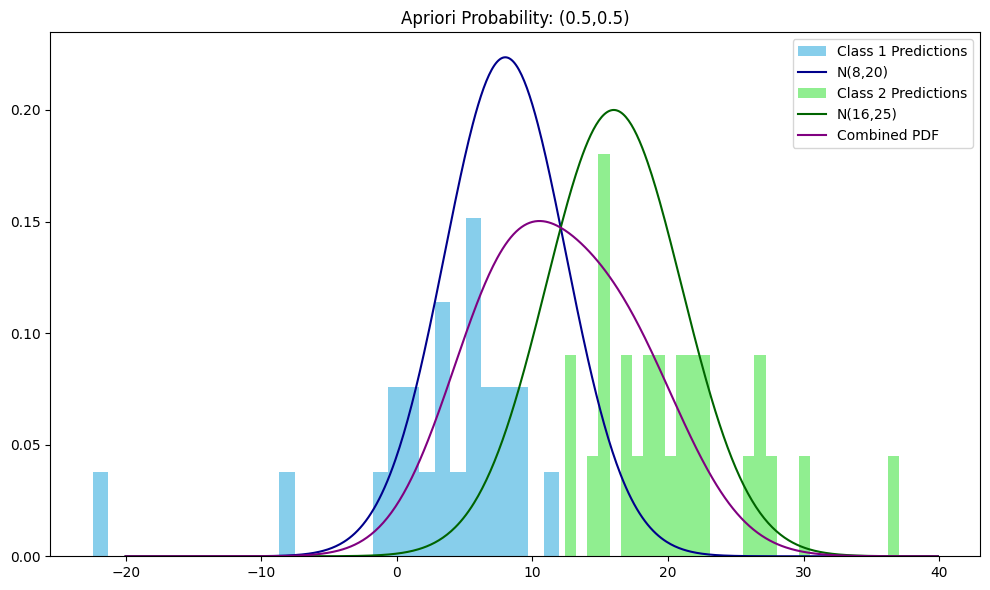

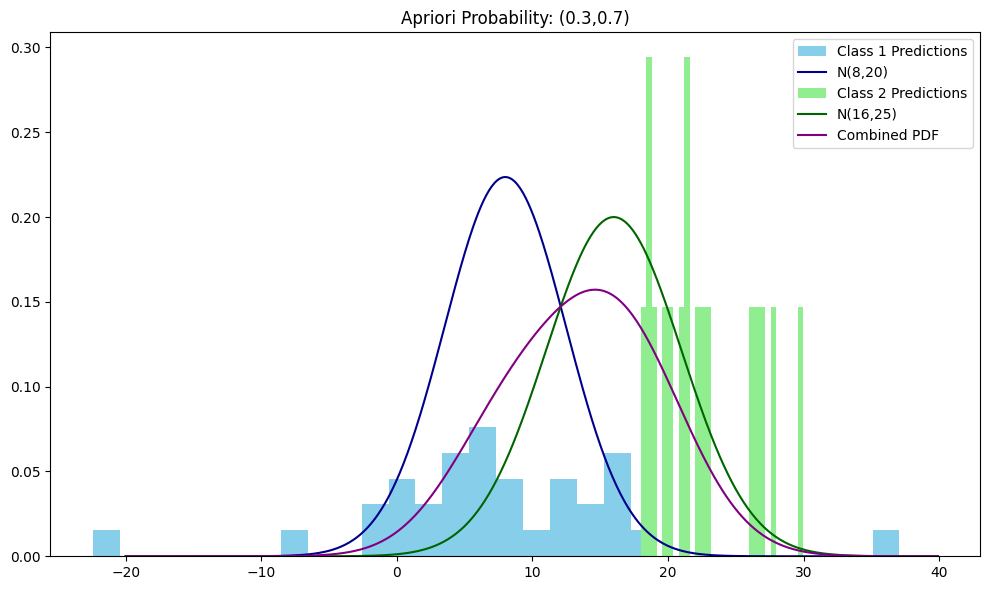

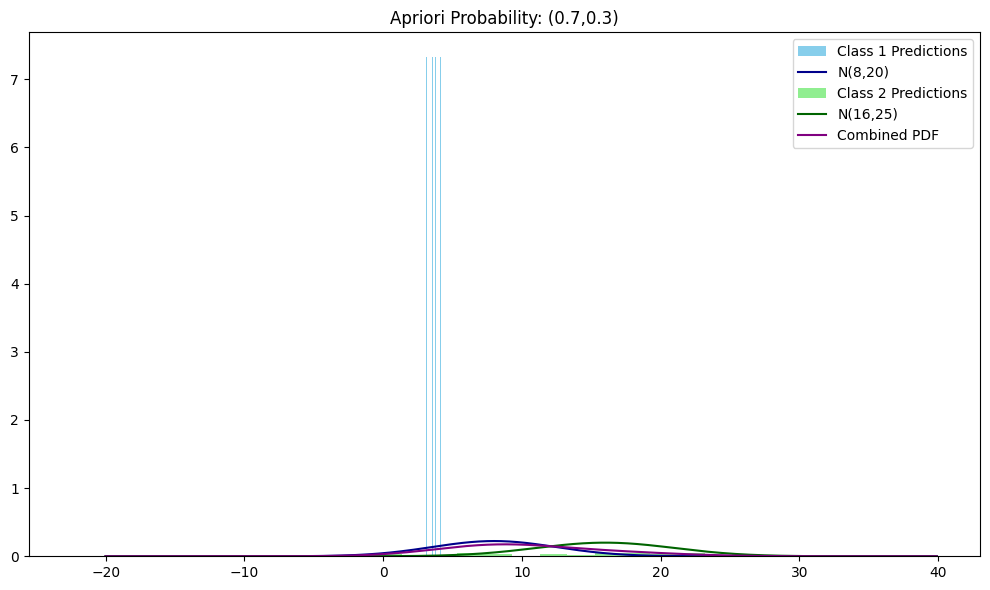

In [25]:
generate_data(11, 10)

c. Draw 50 random samples from N[20,8]  <br>


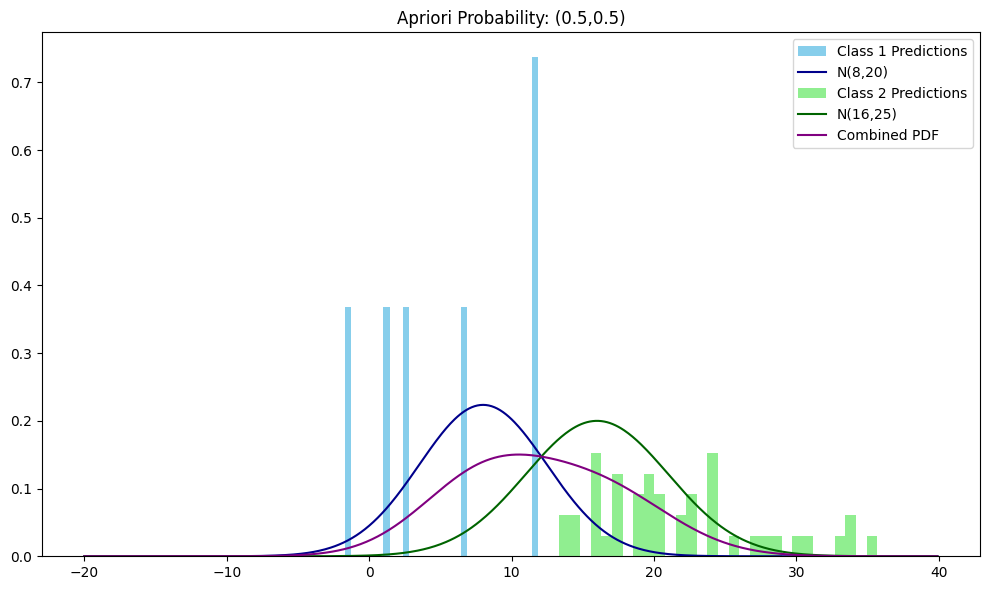

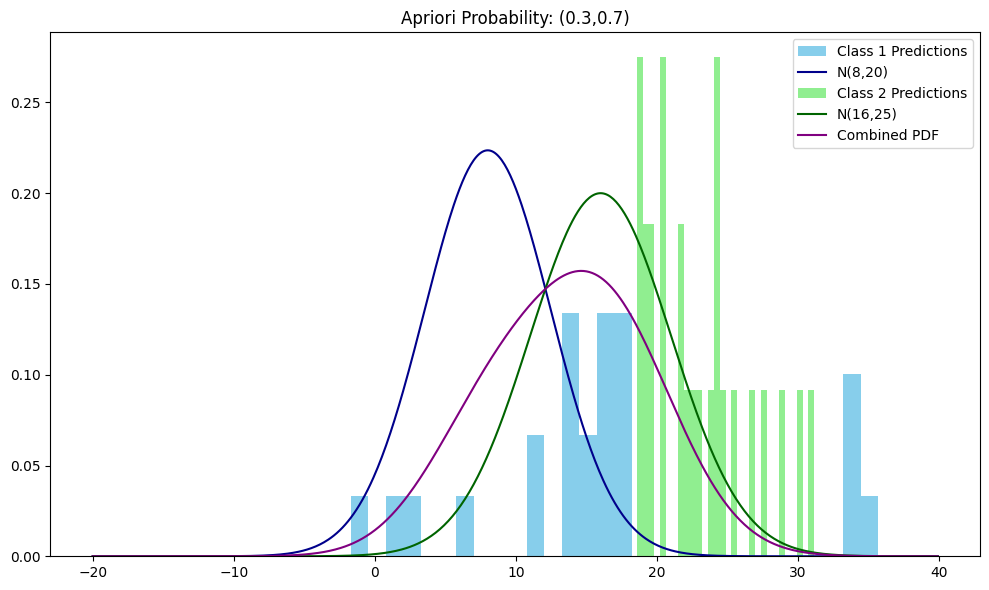

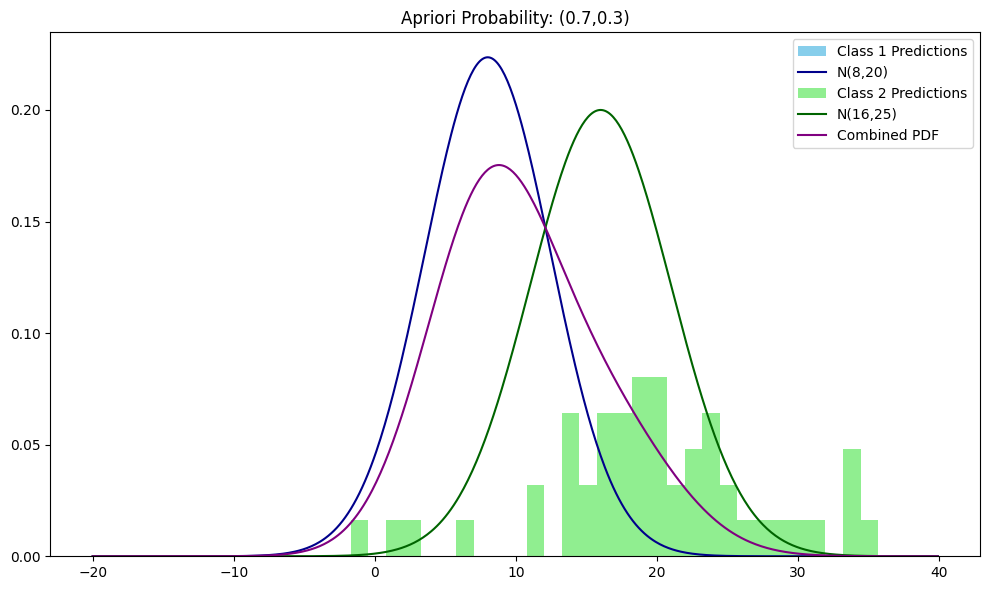

In [26]:
generate_data(20, 8)